# Fork, Chains & Immoralities

### Loading Libraries

In [2]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

# IterTools
from itertools import combinations

# Statistical Models
from scipy import stats
import statsmodels.api as sm

# Networkx
import networkx as nx

# Data Visualization
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt

#### Setting Color & Viz Parameters

In [3]:
COLORS = [
    '#00B0F0',
    '#FF0000',
    '#B0F000'
]

In [4]:
plt.style.use('fivethirtyeight')

#### Visualizations

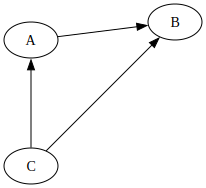

In [5]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,2.75!', '2,3!', '0,1!']

edges = ['AB', 'CB', 'CA']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_05_markov_01')

graph

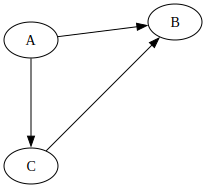

In [6]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,2.75!', '2,3!', '0,1!']

edges = ['AB', 'CB', 'AC']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_05_markov_02')

graph

### Causal Graphs & Independence

In [7]:
NOISE_LEVEL = .2

N_SAMPLES = 1000

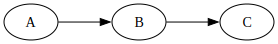

In [8]:
# Chain: A -> B -> C
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,0!', '1.5,0!', '3,0!']

edges = ['AB', 'BC']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_05_chain_00')

graph

In [9]:
# Generate the data
a = np.random.randn(N_SAMPLES) 
b = a + NOISE_LEVEL*np.random.randn(N_SAMPLES) 
c = b + NOISE_LEVEL*np.random.randn(N_SAMPLES) 

# Get combinations
combs = list(combinations([('a', a), ('b', b), ('c', c)], 2))

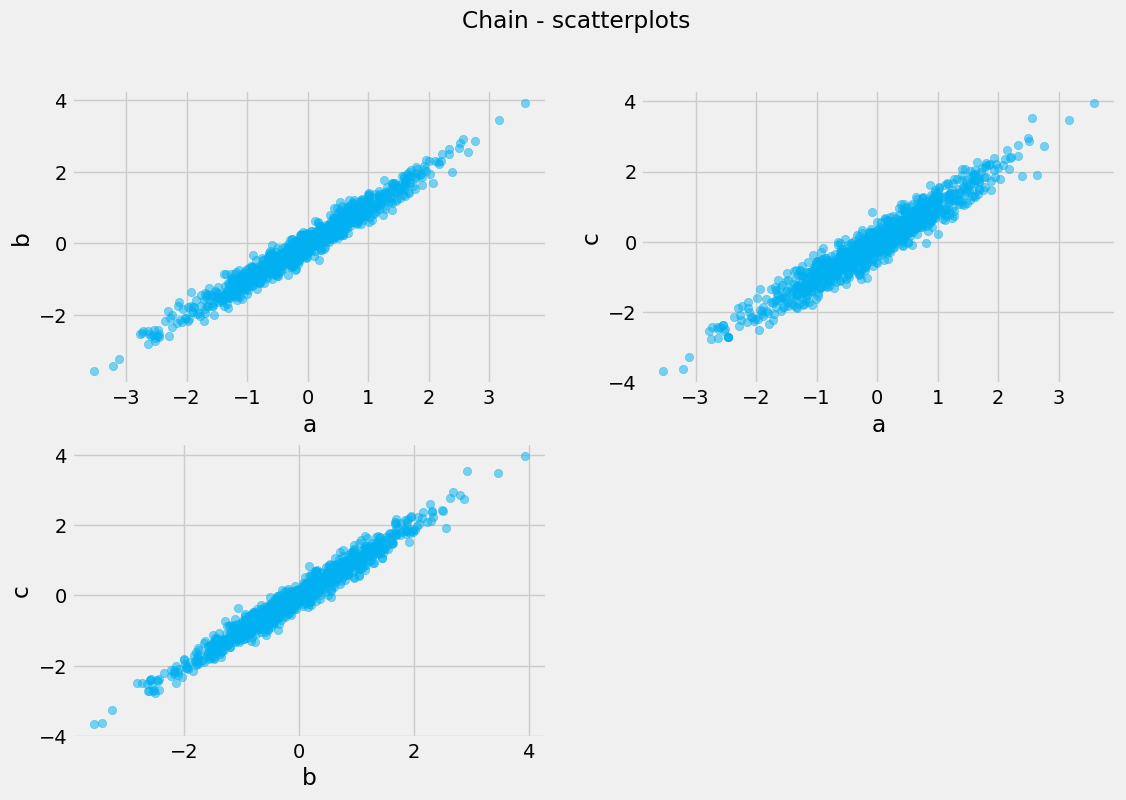

In [10]:
# Plot
plt.figure(figsize=(12, 8))

for i, comb in enumerate(combs):
    key_1, key_2 = comb[0][0], comb[1][0]
    
    
    plt.subplot(2, 2, i + 1)
    plt.scatter(comb[0][1], comb[1][1], alpha=.5, color=COLORS[0])
    plt.xlabel(key_1)
    plt.ylabel(key_2)

plt.suptitle('Chain - scatterplots')
plt.show()

In [11]:
X = pd.DataFrame(np.vstack([a, b]).T, columns=['A', 'B'])
X = sm.add_constant(X, prepend=True)

model = sm.OLS(c, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 1.364e+04
Date:                Thu, 08 Aug 2024   Prob (F-statistic):               0.00
Time:                        08:16:45   Log-Likelihood:                 192.38
No. Observations:                1000   AIC:                            -378.8
Df Residuals:                     997   BIC:                            -364.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.006     -0.054      0.9

### A fork: `A <- B -> C`

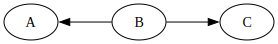

In [12]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,0!', '1.5,0!', '3,0!']

edges = ['BA', 'BC']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_05_fork_00')

graph

In [13]:
# Generate the data
b = np.random.randn(N_SAMPLES) 
a = b + NOISE_LEVEL*np.random.randn(N_SAMPLES) 
c = b + NOISE_LEVEL*np.random.randn(N_SAMPLES) 

# Get combinations
combs = list(combinations([('a', a), ('b', b), ('c', c)], 2))

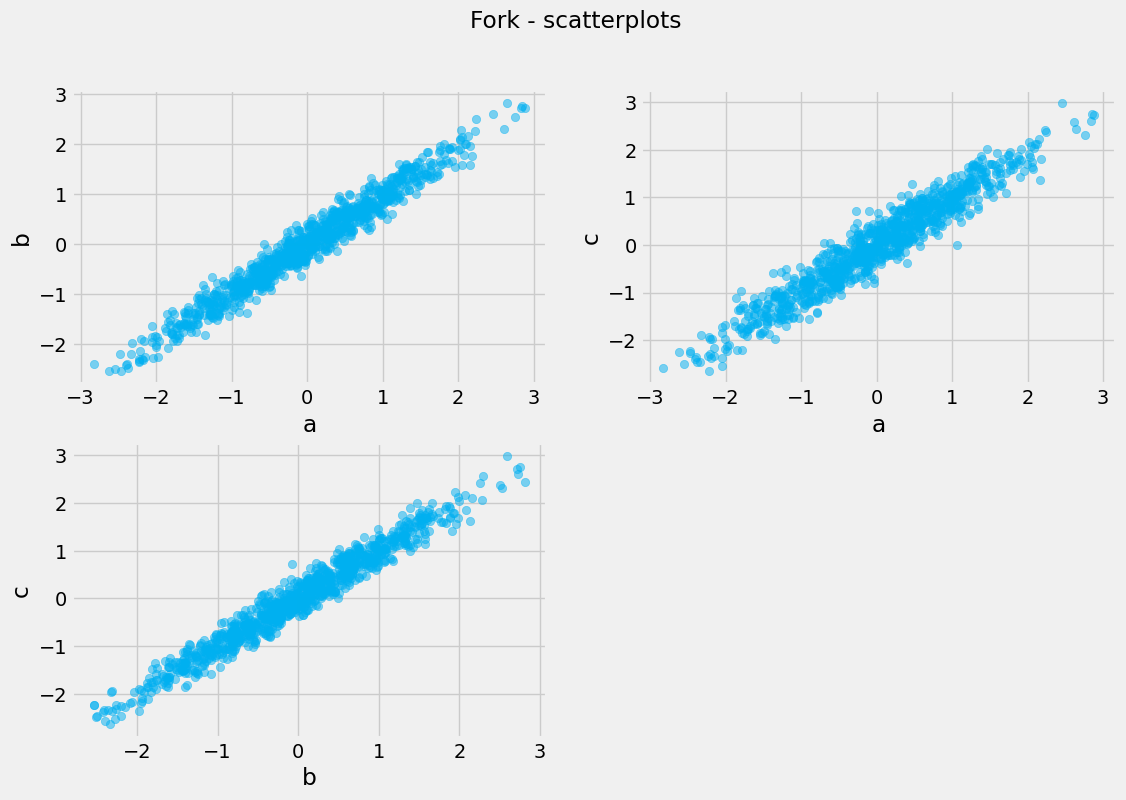

In [14]:
# Plot
plt.figure(figsize=(12, 8))

for i, comb in enumerate(combs):
    key_1, key_2 = comb[0][0], comb[1][0]
    
    
    plt.subplot(2, 2, i + 1)
    plt.scatter(comb[0][1], comb[1][1], alpha=.5, color=COLORS[0])
    plt.xlabel(key_1)
    plt.ylabel(key_2)

plt.suptitle('Fork - scatterplots')
plt.show()

In [15]:
X = pd.DataFrame(np.vstack([a, b]).T, columns=['A', 'B'])
X = sm.add_constant(X, prepend=True)

model = sm.OLS(c, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.167e+04
Date:                Thu, 08 Aug 2024   Prob (F-statistic):               0.00
Time:                        08:17:29   Log-Likelihood:                 170.03
No. Observations:                1000   AIC:                            -334.1
Df Residuals:                     997   BIC:                            -319.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0089      0.006      1.376      0.1

### A Collider: `A -> B <- C`

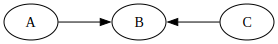

In [16]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,0!', '1.5,0!', '3,0!']

edges = ['AB', 'CB']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_05_collider_00')

graph

In [17]:
# Generate the data
a = np.random.randn(N_SAMPLES) 
c = np.random.randn(N_SAMPLES) 
b = a + c + NOISE_LEVEL*np.random.randn(N_SAMPLES) 

# Get combinations
combs = list(combinations([('a', a), ('b', b), ('c', c)], 2))

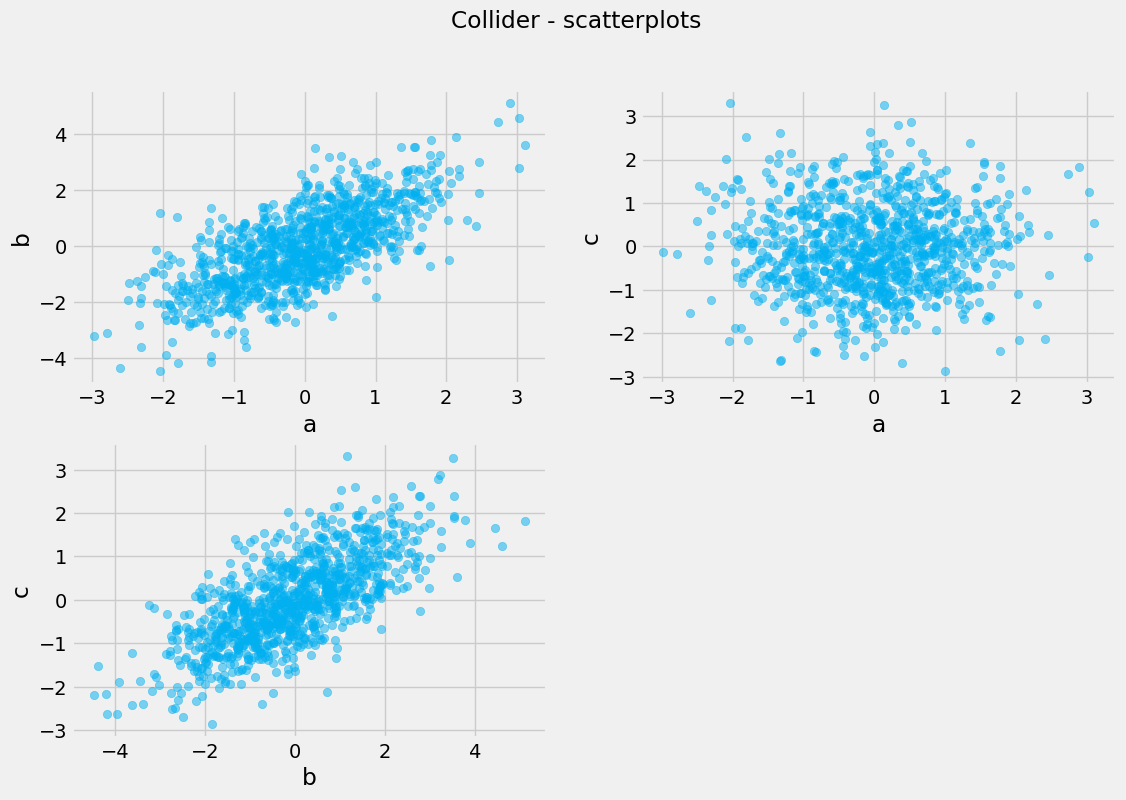

In [18]:
# Plot
plt.figure(figsize=(12, 8))

for i, comb in enumerate(combs):
    key_1, key_2 = comb[0][0], comb[1][0]
    
    
    plt.subplot(2, 2, i + 1)
    plt.scatter(comb[0][1], comb[1][1], alpha=.5, color=COLORS[0])
    plt.xlabel(key_1)
    plt.ylabel(key_2)

plt.suptitle('Collider - scatterplots')
plt.show()

In [19]:
X = pd.DataFrame(np.vstack([a, b]).T, columns=['A', 'B'])
X = sm.add_constant(X, prepend=True)

model = sm.OLS(c, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 1.213e+04
Date:                Thu, 08 Aug 2024   Prob (F-statistic):               0.00
Time:                        08:18:31   Log-Likelihood:                 200.64
No. Observations:                1000   AIC:                            -395.3
Df Residuals:                     997   BIC:                            -380.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0079      0.006     -1.259      0.2